# **Example of gathering image data using webcam**


**Open Data and Private Data**

1. Open Data
The Open Knowledge Foundation describes Open Data as “any content, information or data that people are free to use, reuse, and redistribute without any legal,
technological, or social restriction.”
2. Private Data
Data related to an expectation of privacy and regulated by a particular country/government

**Structured and Unstructured Data**
1. Structured Data
Data entered and maintained in fixed fields within a file or record Easily entered, classified, queried, and analyzed Relational databases or spreadsheets
2. Unstructured Data Lacks organization
Raw data Photo contents, audio, video, web pages, blogs, books, journals, white papers, PowerPoint presentations, articles, email, wikis, word processing
documents, and text in general

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

webcam = cv2.VideoCapture(0)

while True:
    try:
        check, frame = webcam.read()
        if check:  # Check if frame is successfully captured
            print(check)  # prints true as long as the webcam is running
            print(frame)  # prints matrix values of each frame
            cv2_imshow(frame)  # Display the frame
            key = cv2.waitKey(1)

            if key == ord('s'):
                cv2.imwrite(filename='saved_img.jpg', img=frame)
                webcam.release()
                img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
                img_new = cv2_imshow(img_new)
                cv2.waitKey(1650)
                cv2.destroyAllWindows()
                print("Processing image...")
                img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
                print("Converting RGB image to grayscale...")
                gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
                print("Converted RGB image to grayscale...")
                print("Resizing image to 28x28 scale...")
                img_ = cv2.resize(gray, (28, 28))
                print("Resized...")
                img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
                print("Image saved!")
                break

            elif key == ord('q'):
                print("Turning off camera.")
                webcam.release()
                print("Camera off.")
                print("Program ended.")
                cv2.destroyAllWindows()
                break
        else:
            print("Unable to capture frame. Check your webcam connection.")
            break

    except KeyboardInterrupt:
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break


Unable to capture frame. Check your webcam connection.


# **Example of gathering voice data using microphone**

In [ ]:
!pip3 install sounddevice

In [ ]:
!pip3 install wavio

In [ ]:
!pip3 install scipy

In [ ]:
!apt-get install libportaudio2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 1s (81.0 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libt

In [ ]:
!pip install sounddevice --upgrade

In [ ]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 48000

# Recording duration
duration = 5

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq),
 samplerate=freq, channels=2)

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)
# Convert the NumPy array to audio file
wv.write("recording1.wav", recording, freq, sampwidth=2)

PortAudioError: Error querying device -1

# **Web Scraping**

In [ ]:
!pip install bs4

In [ ]:
pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup

def getdata(url):
 r = requests.get(url)
 return r.text

htmldata = getdata("https://www.google.com/")
soup = BeautifulSoup(htmldata, 'html.parser')
for item in soup.find_all('img'):
 print(item['src'])


/images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png


In [ ]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00


# **Image Scraping using Selenium**

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
import time
import requests
import shutil
import os
import getpass
import urllib.request
import io
import time
from PIL import Image
user = getpass.getuser()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
driver.get(search_url.format(q='Car'))

def scroll_to_end(driver):
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
  time.sleep(5)#sleep_between_interactions

def getImageUrls(name,totalImgs,driver):
  search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
  driver.get(search_url.format(q=name))
  img_urls = set()
  img_count = 0
  results_start = 0

  while(img_count<totalImgs): #Extract actual images now

    scroll_to_end(driver)

    thumbnail_results = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
    totalResults=len(thumbnail_results)
    print(f"Found: {totalResults} search results. Extracting links from{results_start}:{totalResults}")

    for img in thumbnail_results[results_start:totalResults]:

      img.click()
      time.sleep(2)
      actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
      for actual_image in actual_images:
        if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
          img_urls.add(actual_image.get_attribute('src'))

      img_count=len(img_urls)

      if img_count >= totalImgs:
        print(f"Found: {img_count} image links")
        break
      else:
        print("Found:", img_count, "looking for more image links ...")
        load_more_button = driver.find_element_by_css_selector(".mye4qd")
        driver.execute_script("document.querySelector('.mye4qd').click();")
        results_start = len(thumbnail_results)
  return img_urls

def downloadImages(folder_path,file_name,url):
    try:
      image_content = requests.get(url).content
    except Exception as e:
      print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
      image_file = io.BytesIO(image_content)
      image = Image.open(image_file).convert('RGB')

      file_path = os.path.join(folder_path, file_name)

      with open(file_path, 'wb') as f:
        image.save(f, "JPEG", quality=85)
      print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
      print(f"ERROR - COULD NOT SAVE {url} - {e}")

def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
      path=os.path.join(destDir,name)
      if not os.path.isdir(path):
        os.mkdir(path)
      print('Current Path',path)
      totalLinks=getImageUrls(name,totalImgs,driver)
      print('totalLinks',totalLinks)
    if totalLinks is None:
        print('images not found for :',name)

    else:
      for i, link in enumerate(totalLinks):
        file_name = f"{i:150}.jpg"
        downloadImages(path,file_name,link)

searchNames=['cat']
destDir=f'/content/drive/My Drive/Colab Notebooks/Dataset/'
totalImgs=5

saveInDestFolder(searchNames,destDir,totalImgs,driver)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [773 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,356 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,898 kB]
Hit:13 https://ppa.launchpadc

TypeError: WebDriver.__init__() got an unexpected keyword argument 'chrome_options'

# **Web Scraping of Movies Information using BeautifulSoup**

In [ ]:
from requests import get
url = 'https://hurawatch.cc/search/logan'
response = get(url)
print(response.text[:500])

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
    <title>Search results for &#39;logan&#39; Movies &amp; Tv Series Hurawatch</title>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>

    <meta name="robots" content="index, follow">
    <meta name="revisit-after" content="1 days">

<meta http-equiv="content-language" content="en"/>
<link rel="dns-prefetch" href="//www.google-analytics.com">
<link rel="dns-prefetch" href="//www.gstat


In [ ]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
headers = {'Accept-Language': 'en-US,en;q=0.8'}
type(html_soup)


bs4.BeautifulSoup

In [ ]:
movie_containers = html_soup.find_all('div', class_ = 'flw-item')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
6


In [ ]:
first_movie = movie_containers[0]
first_movie

<div class="flw-item">
<div class="film-poster">
<div class="pick film-poster-quality">HD</div>
<img alt="Logan" class="film-poster-img lazyload" data-src="https://img.hurawatch.cc/xxrz/250x400/348/16/f7/16f7b48a3df281f25cb746394488ea9d/16f7b48a3df281f25cb746394488ea9d.jpg" title="Logan"/>
<a class="film-poster-ahref flw-item-tip" href="/movie/watch-logan-online-19754" title="Logan"><i class="fa fa-play"></i></a>
</div>
<div class="film-detail">
<h2 class="film-name"><a href="/movie/watch-logan-online-19754" title="Logan">Logan</a>
</h2>
<div class="fd-infor">
<span class="fdi-item">2017</span>
<span class="dot"></span>
<span class="fdi-item fdi-duration">137m</span>
<span class="float-right fdi-type">Movie</span>
</div>
<div class="clearfix"></div>
</div>
<div class="clearfix"></div>
</div>

In [ ]:
first_movie.div

<div class="film-poster">
<div class="pick film-poster-quality">HD</div>
<img alt="Logan" class="film-poster-img lazyload" data-src="https://img.hurawatch.cc/xxrz/250x400/348/16/f7/16f7b48a3df281f25cb746394488ea9d/16f7b48a3df281f25cb746394488ea9d.jpg" title="Logan"/>
<a class="film-poster-ahref flw-item-tip" href="/movie/watch-logan-online-19754" title="Logan"><i class="fa fa-play"></i></a>
</div>

In [ ]:
first_movie.a

<a class="film-poster-ahref flw-item-tip" href="/movie/watch-logan-online-19754" title="Logan"><i class="fa fa-play"></i></a>

In [ ]:
first_movie.h2

<h2 class="film-name"><a href="/movie/watch-logan-online-19754" title="Logan">Logan</a>
</h2>

In [ ]:
first_movie.h2.a

<a href="/movie/watch-logan-online-19754" title="Logan">Logan</a>

In [ ]:
first_name = first_movie.h2.a.text
first_name

'Logan'

In [ ]:
first_year = first_movie.find('span', class_='fdi-item')
if first_year:
    print(first_year.text)
else:
    print("Year information not found")


2017


In [ ]:
first_year = first_year.text
first_year

'2017'

Rating doesn't exist in my link

In [ ]:
first_movie.strong

In [ ]:
first_imdb = float(first_movie.strong.text)
first_imdb

AttributeError: 'NoneType' object has no attribute 'text'

Metascore doesn't exist in my link

In [ ]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)


AttributeError: 'NoneType' object has no attribute 'text'

Votes doesn't exist in my link

In [ ]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

In [ ]:
first_votes['data-value']

TypeError: 'NoneType' object is not subscriptable

In [ ]:
first_votes = int(first_votes['data-value'])

TypeError: 'NoneType' object is not subscriptable

However the site have a time duration

In [ ]:
first_duration = first_movie.find('span', class_='fdi-item fdi-duration')
if first_duration:
    print(first_duration.text)
else:
    print("Duration information not found")


137m


In [ ]:
# Lists to store the scraped data in
names = []
years = []
durations = []


for container in movie_containers:
    if container.find('div', class_='fd-infor') is not None:
        # Name
        name = container.h2.a.text
        names.append(name)

        # Year
        year = container.find('span', class_='fdi-item').text
        years.append(year)

        # Duration
        duration_element = container.find('span', class_='fdi-item fdi-duration')
        if duration_element is not None:
            duration = duration_element.text
        else:
            duration = 'Not available'
        durations.append(duration)

print(names)
print(years)
print(durations)

['Logan', 'Logan Lucky', 'The Night Logan Woke Up', 'The Taking of Deborah Logan', 'The Two Worlds of Jennie Logan', "Logan's Run"]
['2017', '2017', 'SS 1', '2014', '1979', '1976']
['137m', '119m', 'Not available', '90m', '94m', '119m']


In [ ]:
import pandas as pd
test_df = pd.DataFrame({
'movie': names,
'year': years,
'duration': duration,
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie     6 non-null      object
 1   year      6 non-null      object
 2   duration  6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes
None


,movie,year,duration
0,Logan,2017,119m
1,Logan Lucky,2017,119m
2,The Night Logan Woke Up,SS 1,119m
3,The Taking of Deborah Logan,2014,119m
4,The Two Worlds of Jennie Logan,1979,119m
5,Logan's Run,1976,119m


My website doesn't have another batch of movies and is limited to just 6/6

In [ ]:
from time import time, sleep
from random import randint
from IPython.core.display import clear_output
from requests import get
from bs4 import BeautifulSoup
from warnings import warn

# Lists to store the scraped data
names = []
years = []
durations = []  # Adding duration to store movie durations
# IMDb ratings, Metascores, and votes are already present in the code

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# Pages and years_url as per your previous code
pages = ['1', '2', '3', '4', '5']
years_url = ['2017', '2018', '2019', '2020']

for year_url in years_url:
    for page in pages:
        # Make a get request
        response = get('https://hurawatch.cc/search/logan' + year_url +
                       '&sort=num_votes,desc&page=' + page)

        # Pause the loop
        sleep(randint(8, 15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests / elapsed_time))
        clear_output(wait=True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the movie containers from a single page
        mv_containers = page_html.find_all('div', class_='fdi-item')

        # For every movie in the containers
        for container in mv_containers:
            # Extracting movie name
            name = container.h2.a.text
            names.append(name)

            # Extracting movie year
            year = container.h2.find('span', class_='fdi-item').text
            years.append(year)

            # Extracting movie duration
            duration = container.find('span', class_='fdi-item fdi-duration').text
            durations.append(duration)

# Check the scraped data
print(names)
print(years)
print(durations)


KeyboardInterrupt: 

In [ ]:
movie_ratings = pd.DataFrame({
'movie': names,
'year': years,
'duration': duration,
})
print(movie_ratings.info)
movie_ratings.head(10)

In [ ]:
import pandas as pd
movie_df = pd.DataFrame({
'movie': names,
'year': years,
'duration': duration,
})
print(movie_df.info())
movie_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie     6 non-null      object
 1   year      6 non-null      object
 2   duration  6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes
None


,movie,year,duration
0,Logan,2017,119m
1,Logan Lucky,2017,119m
2,The Night Logan Woke Up,SS 1,119m
3,The Taking of Deborah Logan,2014,119m
4,The Two Worlds of Jennie Logan,1979,119m
5,Logan's Run,1976,119m


In [ ]:
movie_df.to_csv('/content/movie_df.csv')

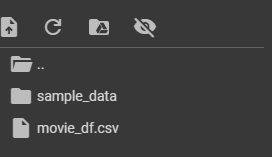

# **Data preparation**

In [ ]:
movie_df['year'].unique()

array(['2017', 'SS 1', '2014', '1979', '1976'], dtype=object)

In [ ]:
movie_df.dtypes

movie       object
year        object
duration    object
dtype: object

In [ ]:
movie_df['year'] = (movie_df.year.apply(lambda x:x.replace('(I)','')))

In [ ]:
movie_df['year'].unique()

array(['2017', 'SS 1', '2014', '1979', '1976'], dtype=object)

In [ ]:
movie_df['year'] = (movie_df.year.apply(lambda x:x.replace('(II)','')))

In [ ]:
movie_df['year'] = (movie_df.year.apply(lambda x:x.replace('(III)','')))

In [ ]:
movie_df['year'].unique()

array(['2017', 'SS 1', '2014', '1979', '1976'], dtype=object)

In [ ]:
movie_df['year'] = (movie_df.year.apply(lambda x:x.replace('(','')))

In [ ]:
movie_df['year'].unique()

array(['2017', 'SS 1', '2014', '1979', '1976'], dtype=object)

In [ ]:
movie_df['year'] = (movie_df.year.apply(lambda x:x.replace(')','')))

In [ ]:
movie_df['year'].unique()

array(['2017', 'SS 1', '2014', '1979', '1976'], dtype=object)

Need to convert SS1 to NaN

In [ ]:
movie_df['year'] = movie_df['year'].astype(int)

ValueError: invalid literal for int() with base 10: 'SS 1'

In [ ]:
print(movie_df['year'].unique())

['2017' 'SS 1' '2014' '1979' '1976']


In [ ]:
# Replace non-numeric values with NaN
movie_df['year'] = pd.to_numeric(movie_df['year'], errors='coerce')

# Drop rows with NaN values in the 'year' column
movie_df = movie_df.dropna(subset=['year'])

# Convert 'year' column to integer type
movie_df['year'] = movie_df['year'].astype(int)

<ipython-input-209-7b367c589dc7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['year'] = movie_df['year'].astype(int)


In [ ]:
movie_df['year'].unique()

array([2017, 2014, 1979, 1976])

In [ ]:
movie_df.head(10)

,movie,year,duration
0,Logan,2017,119m
1,Logan Lucky,2017,119m
3,The Taking of Deborah Logan,2014,119m
4,The Two Worlds of Jennie Logan,1979,119m
5,Logan's Run,1976,119m


In [ ]:
movie_df.tail(10)

,movie,year,duration
0,Logan,2017,119m
1,Logan Lucky,2017,119m
3,The Taking of Deborah Logan,2014,119m
4,The Two Worlds of Jennie Logan,1979,119m
5,Logan's Run,1976,119m


In [ ]:
movie_df

,movie,year,duration
0,Logan,2017,119m
1,Logan Lucky,2017,119m
3,The Taking of Deborah Logan,2014,119m
4,The Two Worlds of Jennie Logan,1979,119m
5,Logan's Run,1976,119m
